In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os



訓練データとテストデータの読み込み

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
train

row_id     A0T0G0C10      A0T0G1C9  A0T0G2C8  A0T0G3C7  A0T0G4C6  \
0            0 -9.536743e-07 -9.536743e-06 -0.000043 -0.000114 -0.000200   
1            1 -9.536743e-07 -9.536743e-06 -0.000043  0.000886 -0.000200   
2            2 -9.536743e-07 -1.536743e-06  0.000007  0.000129  0.000268   
3            3  4.632568e-08 -5.536743e-06  0.000012  0.000245  0.000492   
4            4 -9.536743e-07 -9.536743e-06 -0.000043 -0.000114 -0.000200   
...        ...           ...           ...       ...       ...       ...   
199995  199995 -9.536743e-07  4.632568e-07 -0.000003  0.000176  0.000350   
199996  199996 -9.536743e-07 -9.536743e-06 -0.000043 -0.000114 -0.000200   
199997  199997  4.632568e-08  1.463257e-06 -0.000005 -0.000031 -0.000019   
199998  199998 -9.536743e-07 -9.536743e-06 -0.000043 -0.000114 -0.000200   
199999  199999  1.046326e-06 -1.536743e-06  0.000069  0.000539  0.001329   

        A0T0G5C5  A0T0G6C4  A0T0G7C3  A0T0G8C2  ...  A8T0G1C1  A8T0G2C0  \
0      -0.000240 -0.000200 -0.000114 -0.000043  ... -0.000086 -0.000043   
1       0.000760 -0.000200 -0.000114 -0.000043  ... -0.000086 -0.000043   
2       0.000270  0.000243  0.000125  0.000001  ...  0.000084  0.000048   
3       0.000522  0.000396  0.000197 -0.000003  ...  0.000151  0.000100   
4      -0.000240 -0.000200 -0.000114 -0.000043  ... -0.000086 -0.000043   
...          ...       ...       ...       ...  ...       ...       ...   
199995  0.000290  0.000200  0.000206 -0.000023  ...  0.000124  0.000057   
199996 -0.000240 -0.000200 -0.000114 -0.000043  ... -0.000086 -0.000043   
199997 -0.000037 -0.000037 -0.000015 -0.000005  ...  0.000115  0.000131   
199998 -0.000240 -0.000200 -0.000114 -0.000043  ... -0.000086 -0.000043   
199999  0.001657  0.001328  0.000520  0.000063  ...  0.000065  0.000053   

        A8T1G0C1  A8T1G1C0  A8T2G0C0      A9T0G0C1  A9T0G1C0  A9T1G0C0  \
0      -0.000086 -0.000086 -0.000043 -9.536743e-06 -0.000010 -0.000010   
1       0.000914  0.000914 -0.000043 -9.536743e-06 -0.000010 -0.000010   
2       0.000081  0.000106  0.000072  1.046326e-05  0.000008  0.000019   
3       0.000180  0.000202  0.000153  2.146326e-05  0.000015  0.000046   
4      -0.000086 -0.000086 -0.000043 -9.536743e-06 -0.000010 -0.000010   
...          ...       ...       ...           ...       ...       ...   
199995  0.000104  0.000144  0.000027  4.632568e-07  0.000060  0.000020   
199996  0.000914  0.000914 -0.000043 -9.536743e-06 -0.000010 -0.000010   
199997  0.000110  0.000213  0.000094  1.646326e-05  0.000035  0.000021   
199998  0.001914 -0.000086 -0.000043 -9.536743e-06 -0.000010 -0.000010   
199999  0.000082  0.000102  0.000078  1.446326e-05  0.000013  0.000033   

           A10T0G0C0                    target  
0      -9.536743e-07    Streptococcus_pyogenes  
1      -9.536743e-07       Salmonella_enterica  
2       1.046326e-06       Salmonella_enterica  
3      -9.536743e-07       Salmonella_enterica  
4      -9.536743e-07        Enterococcus_hirae  
...              ...                       ...  
199995 -9.536743e-07       Salmonella_enterica  
199996 -9.536743e-07    Streptococcus_pyogenes  
199997  4.632568e-08  Streptococcus_pneumoniae  
199998 -9.536743e-07     Staphylococcus_aureus  
199999 -9.536743e-07     Klebsiella_pneumoniae  

[200000 rows x 288 columns]

In [4]:
test

row_id     A0T0G0C10  A0T0G1C9      A0T0G2C8  A0T0G3C7  A0T0G4C6  \
0      200000 -9.536743e-07 -0.000002 -9.153442e-07  0.000024  0.000034   
1      200001 -9.536743e-07 -0.000010 -4.291534e-05 -0.000114  0.001800   
2      200002  4.632568e-08  0.000003  8.465576e-08 -0.000014  0.000007   
3      200003 -9.536743e-07 -0.000008  8.084656e-06  0.000216  0.000420   
4      200004 -9.536743e-07 -0.000010 -4.291534e-05 -0.000114 -0.000200   
...       ...           ...       ...           ...       ...       ...   
99995  299995 -9.536743e-07 -0.000008 -4.291534e-05 -0.000108 -0.000194   
99996  299996 -9.536743e-07 -0.000010 -4.291534e-05 -0.000114 -0.000200   
99997  299997 -9.536743e-07 -0.000010 -4.291534e-05 -0.000114 -0.000200   
99998  299998 -9.536743e-07 -0.000010 -4.291534e-05 -0.000114 -0.000200   
99999  299999 -9.536743e-07 -0.000009 -3.991534e-05 -0.000111 -0.000195   

       A0T0G5C5  A0T0G6C4  A0T0G7C3  A0T0G8C2  ...  A8T0G0C2  A8T0G1C1  \
0     -0.000002  0.000021  0.000024 -0.000009  ...  0.000039  0.000085   
1     -0.000240  0.001800 -0.000114  0.000957  ... -0.000043  0.000914   
2     -0.000005 -0.000004  0.000003  0.000004  ...  0.000041  0.000102   
3      0.000514  0.000452  0.000187 -0.000005  ...  0.000069  0.000158   
4     -0.000240 -0.000200 -0.000114 -0.000043  ... -0.000043 -0.000086   
...         ...       ...       ...       ...  ...       ...       ...   
99995 -0.000234 -0.000195 -0.000110 -0.000043  ...  0.000159  0.000559   
99996 -0.000240 -0.000200 -0.000114 -0.000043  ... -0.000043 -0.000086   
99997 -0.000240 -0.000200 -0.000114 -0.000043  ... -0.000043 -0.000086   
99998 -0.000240 -0.000200 -0.000114 -0.000043  ... -0.000043 -0.000086   
99999 -0.000238 -0.000189 -0.000110 -0.000042  ...  0.000304  0.000765   

       A8T0G2C0  A8T1G0C1  A8T1G1C0  A8T2G0C0  A9T0G0C1  A9T0G1C0  A9T1G0C0  \
0      0.000055  0.000108  0.000090  0.000059  0.000010  0.000006  0.000027   
1     -0.000043 -0.000086 -0.000086 -0.000043 -0.000010 -0.000010 -0.000010   
2      0.000084  0.000111  0.000117  0.000070  0.000020  0.000030  0.000021   
3      0.000098  0.000175  0.000217  0.000150  0.000018  0.000016  0.000051   
4     -0.000043 -0.000086  0.000914 -0.000043 -0.000010 -0.000010  0.000990   
...         ...       ...       ...       ...       ...       ...       ...   
99995  0.000489  0.000499  0.000899  0.000443  0.000047  0.000148  0.000101   
99996 -0.000043 -0.000086 -0.000086 -0.000043 -0.000010 -0.000010 -0.000010   
99997 -0.000043  0.000914 -0.000086 -0.000043 -0.000010 -0.000010 -0.000010   
99998 -0.000043 -0.000086 -0.000086 -0.000043 -0.000010 -0.000010 -0.000010   
99999  0.000424  0.000834  0.000875  0.000485  0.000128  0.000144  0.000148   

          A10T0G0C0  
0      4.632568e-08  
1     -9.536743e-07  
2      4.632568e-08  
3     -9.536743e-07  
4     -9.536743e-07  
...             ...  
99995  4.046326e-06  
99996 -9.536743e-07  
99997 -9.536743e-07  
99998 -9.536743e-07  
99999  2.046326e-06  

[100000 rows x 287 columns]

In [10]:
#欠損値がないか確認（nullが1つもなければ以下のprint文でTrueが出力される）
print(np.all(train.isnull().sum() == 0))
print(np.all(test.isnull().sum() == 0))



True
True


In [11]:
#データ型を確認
print(train.dtypes)

row_id         int64
A0T0G0C10    float64
A0T0G1C9     float64
A0T0G2C8     float64
A0T0G3C7     float64
              ...   
A9T0G0C1     float64
A9T0G1C0     float64
A9T1G0C0     float64
A10T0G0C0    float64
target        object
Length: 288, dtype: object


In [ ]:
categorical_features = [
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country']

In [ ]:
def get_uniques(df, columns):
    uniques = dict()
    for column in columns:
        uniques[column] = list(df[column].unique())
    return uniques


In [ ]:
get_uniques(train, categorical_features)

{'workclass': ['Private',
  nan,
  'Local-gov',
  'Self-emp-inc',
  'Federal-gov',
  'Self-emp-not-inc',
  'State-gov'],
 'marital-status': ['Never-married',
  'Married-civ-spouse',
  'Divorced',
  'Separated',
  'Widowed'],
 'occupation': ['Tech-support',
  'Farming-fishing',
  'Other-service',
  'Sales',
  'Exec-managerial',
  'Protective-serv',
  'Adm-clerical',
  'Prof-specialty',
  'Handlers-cleaners',
  'Craft-repair',
  nan,
  'Machine-op-inspct',
  'Transport-moving'],
 'relationship': ['Own-child',
  'Husband',
  'Not-in-family',
  'Unmarried',
  'Wife',
  'Other-relative'],
 'race': ['White', 'Asian-Pac-Islander', 'Black'],
 'sex': ['Female', 'Male'],
 'native-country': ['United-States', 'Mexico', 'Philippines']}

In [ ]:
#ラベルエンコーディングする項目とOneHot encodingする項目を分割
label_encoding_features = ['sex']
one_hot_encoding_features = [
    'workclass', 
    'marital-status', 
    'occupation', 
    'relationship', 
    'race', 
    'native-country',
]


In [ ]:
from sklearn import preprocessing
def label_encoder(df, columns):
    label_encoder = preprocessing.LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df


def onehot_encoder(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df


In [ ]:
train = label_encoder(train, label_encoding_features)
train = onehot_encoder(train, one_hot_encoding_features)

test = label_encoder(test, label_encoding_features)
test = onehot_encoder(test, one_hot_encoding_features)


In [ ]:
train


age  fnlwgt  education-num  sex  Y  Federal-gov  Local-gov  Private  \
0       22  132618             12    0  0            0          0        1   
1       22  132655              9    1  1            0          0        1   
2       23  132674              8    0  0            0          0        0   
3       36  132642             13    1  1            0          0        1   
4       49  132646             13    1  1            0          0        1   
...    ...     ...            ...  ... ..          ...        ...      ...   
10195   31  132650              9    0  0            0          0        1   
10196   36  132590              9    1  0            0          0        1   
10197   36  132498             13    1  0            0          1        0   
10198   17  132614              9    0  0            0          0        1   
10199   36  132691              4    1  0            0          0        0   

       Self-emp-inc  Self-emp-not-inc  ...  Other-relative  Own-child  \
0                 0                 0  ...               0          1   
1                 0                 0  ...               0          0   
2                 0                 0  ...               0          0   
3                 0                 0  ...               0          0   
4                 0                 0  ...               0          0   
...             ...               ...  ...             ...        ...   
10195             0                 0  ...               1          0   
10196             0                 0  ...               0          0   
10197             0                 0  ...               0          0   
10198             0                 0  ...               0          0   
10199             0                 0  ...               0          0   

       Unmarried  Wife  Asian-Pac-Islander  Black  White  Mexico  Philippines  \
0              0     0                   0      0      1       0            0   
1              0     0                   0      0      1       1            0   
2              0     0                   0      0      1       0            0   
3              0     0                   0      0      1       0            0   
4              0     0                   0      0      1       0            0   
...          ...   ...                 ...    ...    ...     ...          ...   
10195          0     0                   0      0      1       1            0   
10196          1     0                   0      0      1       1            0   
10197          0     0                   0      1      0       0            0   
10198          0     0                   0      0      1       0            0   
10199          0     0                   0      1      0       0            0   

       United-States  
0                  1  
1                  0  
2                  1  
3                  1  
4                  1  
...              ...  
10195              0  
10196              0  
10197              1  
10198              1  
10199              1  

[10200 rows x 40 columns]

In [ ]:
test


age  fnlwgt  education-num  sex  Federal-gov  Local-gov  Private  \
0      30  132646             12    1            0          0        1   
1      30  132626              4    0            0          0        1   
2      36  132505              8    1            0          0        1   
3      23  132610              9    0            0          0        1   
4      36  132468              9    1            0          0        1   
...   ...     ...            ...  ...          ...        ...      ...   
6795   31  132530              9    0            0          0        1   
6796   31  132634              6    1            0          0        1   
6797   31  132598             13    1            0          0        1   
6798   23  132573              8    0            0          0        1   
6799   23  132633              9    0            0          0        0   

      Self-emp-inc  Self-emp-not-inc  State-gov  ...  Other-relative  \
0                0                 0          0  ...               0   
1                0                 0          0  ...               0   
2                0                 0          0  ...               0   
3                0                 0          0  ...               0   
4                0                 0          0  ...               0   
...            ...               ...        ...  ...             ...   
6795             0                 0          0  ...               0   
6796             0                 0          0  ...               0   
6797             0                 0          0  ...               0   
6798             0                 0          0  ...               0   
6799             0                 0          0  ...               0   

      Own-child  Unmarried  Wife  Asian-Pac-Islander  Black  White  Mexico  \
0             0          1     0                   0      0      1       1   
1             0          0     1                   0      0      1       0   
2             0          0     0                   0      0      1       1   
3             0          0     0                   0      0      1       0   
4             0          0     0                   0      0      1       0   
...         ...        ...   ...                 ...    ...    ...     ...   
6795          0          0     0                   0      0      1       0   
6796          0          0     0                   1      0      0       0   
6797          0          0     0                   0      0      1       0   
6798          0          0     0                   0      1      0       0   
6799          1          0     0                   0      0      1       0   

      Philippines  United-States  
0               0              0  
1               0              1  
2               0              0  
3               0              1  
4               0              1  
...           ...            ...  
6795            0              1  
6796            0              1  
6797            0              1  
6798            0              1  
6799            0              1  

[6800 rows x 39 columns]

In [ ]:
#クロスバリデーションで評価
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state=1000)
for train_indices, val_indices in kf.split(train):
  print("train_indices", train_indices)
  print("val_indices", val_indices)



train_indices [    0     2     3 ... 10197 10198 10199]
val_indices [    1     6    14 ... 10187 10189 10193]
train_indices [    1     2     4 ... 10197 10198 10199]
val_indices [    0     3    17 ... 10190 10194 10195]
train_indices [    0     1     2 ... 10197 10198 10199]
val_indices [    5     7     9 ... 10185 10191 10196]
train_indices [    0     1     2 ... 10195 10196 10199]
val_indices [    4     8    12 ... 10192 10197 10198]
train_indices [    0     1     3 ... 10196 10197 10198]
val_indices [    2    11    19 ... 10178 10183 10199]


In [ ]:
#列名と通し番号の対応を辞書として管理
namemap = {}
for i, column in enumerate(train.columns):
  if column == 'Y':   #正解列はそのままとする
    namemap[column] = 'Y'
  else:               #それ以外は通し番号に変更
    namemap[column] = str(i)
print(namemap)


{'age': '0', 'fnlwgt': '1', 'education-num': '2', 'sex': '3', 'Y': 'Y', 'Federal-gov': '5', 'Local-gov': '6', 'Private': '7', 'Self-emp-inc': '8', 'Self-emp-not-inc': '9', 'State-gov': '10', 'Divorced': '11', 'Married-civ-spouse': '12', 'Never-married': '13', 'Separated': '14', 'Widowed': '15', 'Adm-clerical': '16', 'Craft-repair': '17', 'Exec-managerial': '18', 'Farming-fishing': '19', 'Handlers-cleaners': '20', 'Machine-op-inspct': '21', 'Other-service': '22', 'Prof-specialty': '23', 'Protective-serv': '24', 'Sales': '25', 'Tech-support': '26', 'Transport-moving': '27', 'Husband': '28', 'Not-in-family': '29', 'Other-relative': '30', 'Own-child': '31', 'Unmarried': '32', 'Wife': '33', 'Asian-Pac-Islander': '34', 'Black': '35', 'White': '36', 'Mexico': '37', 'Philippines': '38', 'United-States': '39'}


In [ ]:
numeric_cols = []
for col in train.columns:
  if col == 'Y':  # 正解列はそのままとする
    continue
  try:
    train[col].astype(float)
    numeric_cols.append(namemap[col])
  except:
    continue
print(numeric_cols)


['0', '1', '2', '3', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']


[[ 1.27104391]
 [-0.82744781]
 [ 1.58414781]
 ...
 [-1.50684385]
 [ 1.40791202]
 [-0.42903239]]


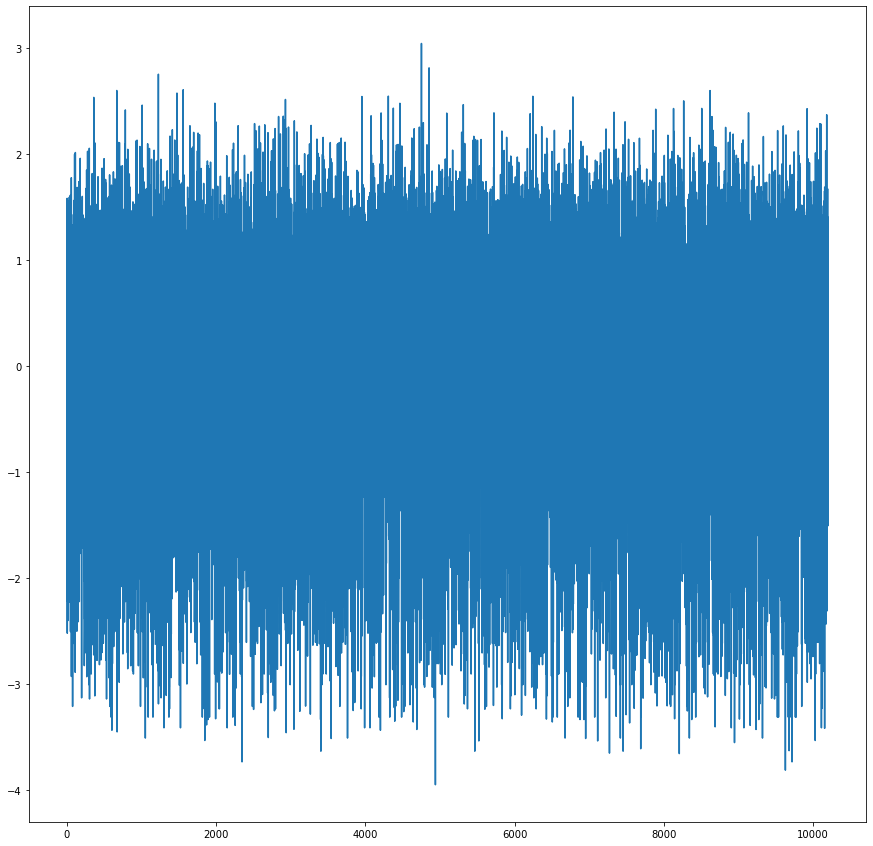

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n = 1000
clf = LinearDiscriminantAnalysis(n_components=1).fit(
    train.drop('Y', axis=1)[:n], train['Y'][:n]
    )
train_x_embedded = clf.transform(train.drop('Y', axis=1))
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cm = train['Y']
cm = cm.replace(0, "red")
cm = cm.replace(1, "blue")
print(train_x_embedded)
#ax.scatter(train_x_embedded[:, 2], train_x_embedded[:, 0], train_x_embedded[:, 1], s = 40, c = cm)
ax.plot(train_x_embedded)
plt.show()


[LightGBM] [Info] Number of positive: 2002, number of negative: 6158
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 8160, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.245343 -> initscore=-1.123605
[LightGBM] [Info] Start training from score -1.123605
Training until validation scores don't improve for 1000 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	train's binary_logloss: 0.55218	valid's binary_logloss: 0.534471
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	train's binary_logloss: 0.547331	valid's binary_logloss: 0.529809
[30]	train's b

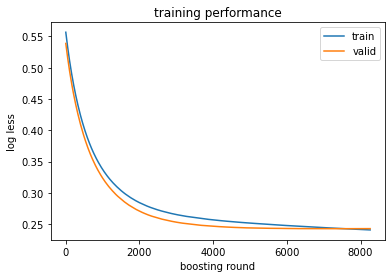

[LightGBM] [Info] Number of positive: 2003, number of negative: 6157
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 8160, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.245466 -> initscore=-1.122944
[LightGBM] [Info] Start training from score -1.122944
Training until validation scores don't improve for 1000 rounds
[10]	train's binary_logloss: 0.552246	valid's binary_logloss: 0.53399
[20]	train's binary_logloss: 0.547352	valid's binary_logloss: 0.529393
[30]	train's binary_logloss: 0.54255	valid's binary_logloss: 0.524883
[40]	train's binary_logloss: 0.537871	valid's binary_logloss: 0.520513
[50]	train's binary_logloss: 0.533336	valid's binary_logloss: 0.516256
[60]	train's binary_logloss

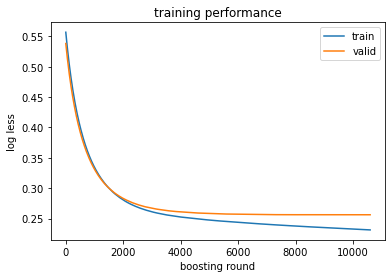

[LightGBM] [Info] Number of positive: 1933, number of negative: 6227
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 8160, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.236887 -> initscore=-1.169821
[LightGBM] [Info] Start training from score -1.169821
Training until validation scores don't improve for 1000 rounds
[10]	train's binary_logloss: 0.542531	valid's binary_logloss: 0.573034
[20]	train's binary_logloss: 0.537747	valid's binary_logloss: 0.567931
[30]	train's binary_logloss: 0.533081	valid's binary_logloss: 0.562971
[40]	train's binary_logloss: 0.528525	valid's binary_logloss: 0.558114
[50]	train's binary_logloss: 0.524057	valid's binary_logloss: 0.553366
[60]	train's binary_loglo

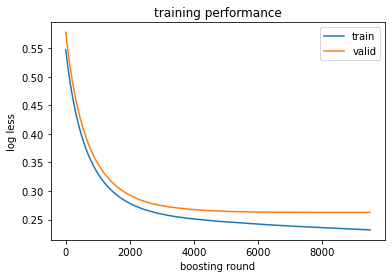

[LightGBM] [Info] Number of positive: 1979, number of negative: 6181
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 8160, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242525 -> initscore=-1.138888
[LightGBM] [Info] Start training from score -1.138888
Training until validation scores don't improve for 1000 rounds
[10]	train's binary_logloss: 0.548925	valid's binary_logloss: 0.546817
[20]	train's binary_logloss: 0.544028	valid's binary_logloss: 0.541931
[30]	train's binary_logloss: 0.539267	valid's binary_logloss: 0.537193
[40]	train's binary_logloss: 0.534612	valid's binary_logloss: 0.532546
[50]	train's binary_logloss: 0.530054	valid's binary_logloss: 0.528008
[60]	train's binary_loglo

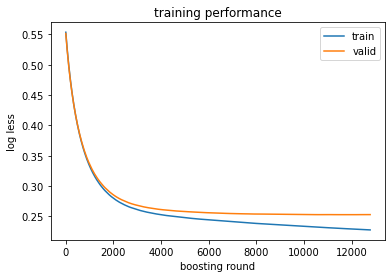

[LightGBM] [Info] Number of positive: 1963, number of negative: 6197
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 8160, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240564 -> initscore=-1.149591
[LightGBM] [Info] Start training from score -1.149591
Training until validation scores don't improve for 1000 rounds
[10]	train's binary_logloss: 0.546721	valid's binary_logloss: 0.555816
[20]	train's binary_logloss: 0.541854	valid's binary_logloss: 0.550882
[30]	train's binary_logloss: 0.537116	valid's binary_logloss: 0.54608
[40]	train's binary_logloss: 0.532495	valid's binary_logloss: 0.541412
[50]	train's binary_logloss: 0.527961	valid's binary_logloss: 0.53681
[60]	train's binary_logloss

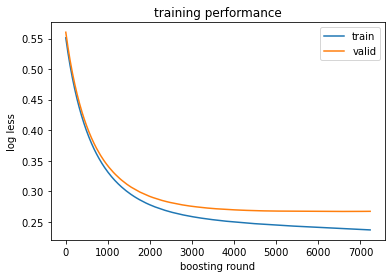

In [ ]:
import lightgbm as lgb
import numpy as np

val_preds = np.zeros(len(train))

params = {
"objective" : "binary",
"metric" : "binary_logloss",
"learning_rate" : 0.001,
"num_iterations" : 20000,
"num_leaves" : 11,
"max_depth" : 4,
"min_data_in_leaf" : 0,
"bagging_fraction" : 0.8,
"bagging_freq" : 3,
"lambda_l2" : 1,
"lambda_l1" : 1,
"seed" : 42,
"n_jobs" : -1
}

models=[]

for train_indices, val_indeices in kf.split(train):
  train_kfold, val_kfold = train.iloc[train_indices], train.iloc[val_indeices]
  X_train, X_val = train_kfold.drop('Y', axis=1), val_kfold.drop('Y', axis=1)
  Y_train, Y_val = train_kfold['Y'], val_kfold['Y']
  X_train.columns = X_train.columns.map(namemap)
  X_val.columns = X_val.columns.map(namemap)

  train_dataset = lgb.Dataset(X_train[numeric_cols], Y_train)
  val_dataset = lgb.Dataset(X_val[numeric_cols], Y_val, reference=train_dataset)

  evaluation_results = {}
  model = lgb.train(
    params, 
    train_dataset, 
    valid_sets=[train_dataset, val_dataset],
    verbose_eval=10,
    early_stopping_rounds=1000,
    num_boost_round=10000,
    evals_result=evaluation_results,
    valid_names=['train', 'valid']
    )
  plt.plot(evaluation_results['train']['binary_logloss'], label='train')
  plt.plot(evaluation_results['valid']['binary_logloss'], label='valid')
  plt.ylabel('log less')
  plt.xlabel('boosting round')
  plt.title('training performance')
  plt.legend()
  plt.show()

  models.append(model)
  val_preds[val_indeices] = model.predict(X_val[numeric_cols])


In [ ]:
from sklearn.metrics import accuracy_score
val_preds_result = np.where(val_preds<0.5, 0, 1)
print(val_preds_result)
accuracy_score(train['Y'], val_preds_result)


[0 0 0 ... 1 0 0]


0.8790196078431373

In [ ]:
test_id = pd.read_csv("../data/test.csv")['id']
test.columns = test.columns.map(namemap)

X_test = test[numeric_cols]


KeyError: "None of [Index(['0', '1', '2', '3', '5', '6', '7', '8', '9', '10', '11', '12', '13',\n       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',\n       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',\n       '38', '39'],\n      dtype='object')] are in the [columns]"

In [ ]:
preds=[]

for i, model in enumerate(models):
  preds.append(model.predict(X_test))

preds = np.array(preds)


In [ ]:
preds.shape
print(preds)

preds_mean = preds.mean(axis = 0)
preds_mean = np.where(preds_mean < 0.5, 0, 1)
print(preds_mean)


[[0.02484526 0.01536433 0.42993961 ... 0.02274609 0.00266845 0.00178508]
 [0.01596317 0.00815803 0.37241404 ... 0.02187771 0.00143118 0.00186915]
 [0.01801675 0.0117682  0.42538749 ... 0.01949205 0.00168001 0.00215539]
 [0.0190974  0.00899021 0.48675592 ... 0.0160147  0.00093021 0.00122486]
 [0.0135421  0.0058482  0.37098195 ... 0.01561829 0.00187014 0.00192152]]
[0 0 0 ... 0 0 0]


In [ ]:
submit = np.c_[test_id, preds_mean]

np.savetxt("submission.csv", submit, delimiter=',', fmt="%.0f")
